In [1]:
%pwd

'/home/vinay/fastai/courses/dl1'

In [2]:
path = '/home/vinay/fastai/data/plant_seedlings/'

In [3]:
!ls {path}

models	sample_submission.csv  subm  test1  tmp  train	valid


In [4]:
import pandas as pd
sub = pd.read_csv(f'{path}sample_submission.csv')

In [5]:
sub

,file,species
0,0021e90e4.png,Sugar beet
1,003d61042.png,Sugar beet
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Sugar beet
4,00c47e980.png,Sugar beet
5,00d090cde.png,Sugar beet
6,00ef713a8.png,Sugar beet
7,01291174f.png,Sugar beet
8,026716f9b.png,Sugar beet
9,02cfeb38d.png,Sugar beet


In [6]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from fastai.imports import *

In [7]:
%matplotlib inline

In [8]:
sz = 32
bs = 8
arch = resnet34
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(path,tfms = tfms,trn_name = 'train',val_name ='valid' ,test_name = 'test1')
learn = ConvLearner.pretrained(arch, data, precompute=True)


100%|██████████| 13/13 [00:06<00:00,  2.05it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 43%|████▎     | 28/65 [00:00<00:00, 66.64it/s, loss=24.1]


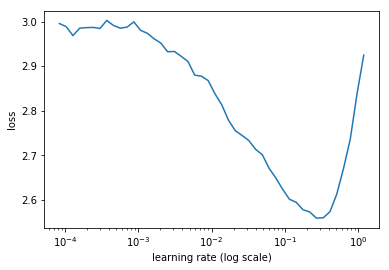

In [10]:

lrf=learn.lr_find()
learn.sched.plot()

In [11]:
sz = 299
bs = 32
arch = resnet34
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(path,tfms = tfms,trn_name = 'train',val_name ='valid' ,test_name = 'test1')
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 13/13 [00:04<00:00,  3.13it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 92%|█████████▏| 60/65 [00:00<00:00, 140.65it/s, loss=15.1]


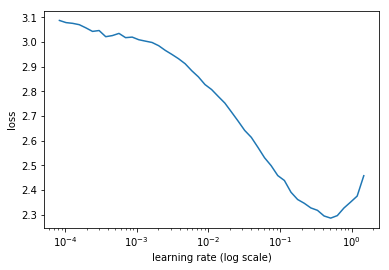

In [12]:
lrf = learn.lr_find()
learn.sched.plot()

In [13]:
lr = 0.09
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      1.275102   0.681461   0.758854  
    1      0.988959   0.501916   0.811979                   
    2      0.681624   0.460816   0.811979                   
    3      0.637496   0.579975   0.807292                   
    4      0.561107   0.419838   0.838194                   
    5      0.440641   0.38652    0.849132                   
    6      0.36935    0.385592   0.846354                  



[0.38559192, 0.8463541686534881]

In [14]:
learn.fit(lr,3,cycle_len = 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.378307   0.39726    0.847569  
    1      0.366442   0.40637    0.844444                   
    2      0.335453   0.405124   0.846007                   



[0.40512365, 0.8460069417953491]

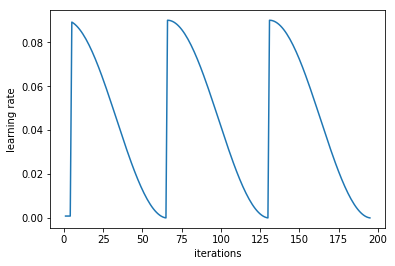

In [16]:
learn.sched.plot_lr()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 94%|█████████▍| 61/65 [00:23<00:01,  2.62it/s, loss=2.19] 

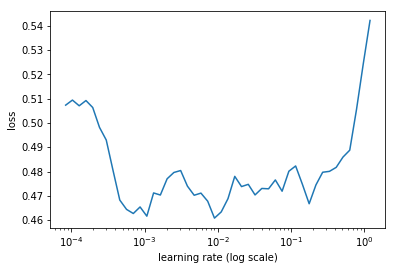

In [17]:
lrs = [lr/9, lr/3, lr]
learn.unfreeze()
lrf = learn.lr_find()
learn.sched.plot()

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.499063   0.826816   0.705729  
    1      1.272654   0.753458   0.722049                  
    2      0.920073   0.643262   0.778819                  
    3      0.899063   0.683728   0.765104                  
    4      0.767358   0.612884   0.786979                  
    5      0.607631   0.588113   0.785069                  
    6      0.529521   0.561447   0.793229                  



[0.5614468, 0.7932291686534881]

In [13]:
%matplotlib inline
new_learn.sched.plot_loss()

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.751293   0.600219   0.790104  
    1      0.776012   0.61171    0.790104                  
    2      0.686076   0.569356   0.802604                  
    3      0.726685   0.63384    0.788542                  
    4      0.685207   0.560518   0.803819                  
    5      0.635809   0.514476   0.816667                  
    6      0.581119   0.532182   0.805382                  



[0.5321816, 0.8053819417953492]

In [15]:
new_learn.sched.plot_loss()


In [16]:
lrs = [lr/9, lr/3, lr]
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

NameError: name 'learn' is not defined

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.948224   0.555384   0.779861  
    1      0.618261   0.47517    0.81441                   
    2      0.383943   0.229603   0.91441                   
    3      0.372223   0.50745    0.844097                  
    4      0.303468   0.229725   0.917535                  
    5      0.225938   0.168755   0.931597                  
    6      0.164935   0.143078   0.942535                  



In [8]:

arch = resnext50

def get_data(sz, bs):
    """Returns data generator"""
    tfms =  tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    return ImageClassifierData.from_paths(path,tfms = tfms,trn_name = 'train',val_name ='valid' ,test_name = 'test1')





data = get_data(128,32)
new_learn = ConvLearner.pretrained(arch, data, precompute=True,ps = 0.5)
lr = 0.095
new_learn.fit(lr,3,cycle_len = 1,cycle_mult=2)


new_learn.precompute = False
lr = 0.095
new_learn.fit(lr, 3, cycle_len=1, cycle_mult=2)
lrs = [lr/9, lr/3, lr]
new_learn.unfreeze()
new_learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
new_learn.save('new128_plant_seedlings')


HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.58694    0.923348   0.691667  
    1      1.286922   0.804263   0.710417                 
    2      0.911589   0.655309   0.766319                  
    3      0.902501   0.755345   0.744792                   
    4      0.772777   0.663331   0.777951                  
    5      0.632578   0.61617    0.793229                  
    6      0.528028   0.612152   0.783854                  



HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.790901   0.588709   0.785764  
    1      0.754229   0.697051   0.768229                  
    2      0.688716   0.5866     0.786632                  
    3      0.725029   0.621361   0.768924                  
    4      0.703936   0.582823   0.763542                  
    5      0.644445   0.564817   0.799479                  
    6      0.586591   0.559188   0.802257                  



HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.936854   0.543024   0.784201  
    1      0.640659   0.416618   0.846007                  
    2      0.388159   0.261439   0.886285                  
    3      0.388575   0.319394   0.882292                  
    4      0.297184   0.200385   0.924479                  
    5      0.21812    0.17589    0.944097                  
    6      0.164187   0.161577   0.94566                   



In [12]:
new_learn.load('new128_plant_seedlings')
log_pred,y = new_learn.TTA(is_test = True)

In [18]:
pred = np.exp(log_pred)

In [22]:
out = np.argmax(pred,axis =0)

In [24]:
out.shape

(794, 12)

In [25]:
pred.shape

(5, 794, 12)

In [27]:
preds = np.mean(pred, axis=0)

In [28]:
preds.shape

(794, 12)

In [49]:
ele = list(np.argmax(preds,axis = 1))

In [30]:
%ls {path}


models/  sample_submission.csv  subm/  test1/  tmp/  train/  valid/


In [31]:
path


'/home/vinay/fastai/data/plant_seedlings/'

In [33]:
new = path + 'train/'

In [45]:
cate = []
for cat in os.listdir(new):
    cate.append(cat)

In [46]:
cate

['Small-flowered Cranesbill',
 'Black-grass',
 'Common wheat',
 'Fat Hen',
 'Common Chickweed',
 'Charlock',
 'Shepherds Purse',
 'Cleavers',
 'Scentless Mayweed',
 'Loose Silky-bent',
 'Maize',
 'Sugar beet']

In [48]:
cate = sorted(cate,key = str.lower)

In [50]:
new_list = []
for i in ele:
    new_list.append(cate[i])

In [51]:
new_list

['Common Chickweed',
 'Common Chickweed',
 'Scentless Mayweed',
 'Fat Hen',
 'Fat Hen',
 'Shepherds Purse',
 'Common Chickweed',
 'Loose Silky-bent',
 'Charlock',
 'Fat Hen',
 'Maize',
 'Common Chickweed',
 'Shepherds Purse',
 'Shepherds Purse',
 'Common Chickweed',
 'Scentless Mayweed',
 'Loose Silky-bent',
 'Scentless Mayweed',
 'Small-flowered Cranesbill',
 'Maize',
 'Fat Hen',
 'Cleavers',
 'Sugar beet',
 'Fat Hen',
 'Small-flowered Cranesbill',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Common Chickweed',
 'Small-flowered Cranesbill',
 'Loose Silky-bent',
 'Scentless Mayweed',
 'Charlock',
 'Shepherds Purse',
 'Loose Silky-bent',
 'Loose Silky-bent',
 'Common Chickweed',
 'Cleavers',
 'Sugar beet',
 'Common wheat',
 'Loose Silky-bent',
 'Small-flowered Cranesbill',
 'Sugar beet',
 'Loose Silky-bent',
 'Loose Silky-bent',
 'Fat Hen',
 'Small-flowered Cranesbill',
 'Fat Hen',
 'Common Chickweed',
 'Common wheat',
 'Scentless Mayweed',
 'Small-flowered Cranesbill',
 'Loose Silky-ben

In [52]:
sub

,file,species
0,0021e90e4.png,Sugar beet
1,003d61042.png,Sugar beet
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Sugar beet
4,00c47e980.png,Sugar beet
5,00d090cde.png,Sugar beet
6,00ef713a8.png,Sugar beet
7,01291174f.png,Sugar beet
8,026716f9b.png,Sugar beet
9,02cfeb38d.png,Sugar beet


In [54]:
sub['file']

0      0021e90e4.png
1      003d61042.png
2      007b3da8b.png
3      0086a6340.png
4      00c47e980.png
5      00d090cde.png
6      00ef713a8.png
7      01291174f.png
8      026716f9b.png
9      02cfeb38d.png
10     03566743d.png
11     03a2ee656.png
12     03e322a29.png
13     03ef36742.png
14     043449b0b.png
15     0437393b1.png
16     04814f36d.png
17     05341a8a6.png
18     060450d79.png
19     060f1dc84.png
20     0625f063b.png
21     063363305.png
22     06d12f6fa.png
23     071cb3ece.png
24     0751c0bbc.png
25     07e62f903.png
26     085974290.png
27     0885e7690.png
28     089ad62a7.png
29     08d591441.png
           ...      
764    f593c9cf0.png
765    f66ae4070.png
766    f6d250856.png
767    f8318faf1.png
768    f85ed9b6d.png
769    f9b6bfb00.png
770    f9ea23fb5.png
771    f9f35cbd4.png
772    fa5fd1384.png
773    fa9f3a8f9.png
774    fadc6adbc.png
775    fb022edf9.png
776    fba8fc78a.png
777    fbf88b6be.png
778    fc3e58836.png
779    fc6f686fb.png
780    fd253a

In [56]:
sub.drop(inplace = True,labels = 'species',axis = 1)

In [57]:
sub

,file
0,0021e90e4.png
1,003d61042.png
2,007b3da8b.png
3,0086a6340.png
4,00c47e980.png
5,00d090cde.png
6,00ef713a8.png
7,01291174f.png
8,026716f9b.png
9,02cfeb38d.png


In [61]:
sub['species'] = np.array(new_list)

In [62]:
path

'/home/vinay/fastai/data/plant_seedlings/'

In [63]:
sub.to_csv(f'{path}plant_seedlings.csv')

In [72]:
new = pd.read_csv(f'{path}plant_seedlings.csv')
new.columns

Index(['Unnamed: 0', 'file', 'species'], dtype='object')

In [74]:
new.drop('Unnamed: 0',axis = 1,inplace = True)

ValueError: labels ['Unnamed: 0'] not contained in axis

In [77]:
new.iloc([])

,file,species
0,0021e90e4.png,Common Chickweed
1,003d61042.png,Common Chickweed
2,007b3da8b.png,Scentless Mayweed
3,0086a6340.png,Fat Hen
4,00c47e980.png,Fat Hen
5,00d090cde.png,Shepherds Purse
6,00ef713a8.png,Common Chickweed
7,01291174f.png,Loose Silky-bent
8,026716f9b.png,Charlock
9,02cfeb38d.png,Fat Hen


In [76]:
new.to_csv(f'{path}plant_seedlings1.csv')

In [85]:
sub['species'] = np.array(new_list)

In [86]:
sub.to_csv(f'{path}plant_seedlings2.csv')

In [108]:
sam_sub = pd.read_csv(f'{path}sample_submission.csv')

In [109]:
sam_sub.columns

Index(['file', 'species'], dtype='object')

In [102]:
ele = np.array([[sam_sub['file']],[new_list]])
new_ele = ele.reshape(794,2)

In [107]:
ele = np.array([sam_sub['file'],new_list]).T

In [113]:
s = pd.DataFrame(ele,columns = sam_sub.columns)
s.to_csv(f'{path}tt1.csv',index = False)

In [115]:
name = []
for file in os.listdir(f'{path}test1'):
    name.append(file)

In [117]:
s['file'] = name

In [119]:
s.to_csv(f'{path}lavda.csv',index = False)